In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#handling numerical dataset
f = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [12]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [18]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [20]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [26]:
# Impute missing values in Age_imputed for X_train
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(
    X_train['Age_imputed'].isnull().sum(), random_state=42
).values

# Impute missing values in Age_imputed for X_test
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(
    X_test['Age_imputed'].isnull().sum(), random_state=42
).values

In [34]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([40.  , 37.  , 23.  , 24.  , 24.  , 16.  , 30.  ,  2.  , 54.  ,
        8.  , 20.  , 25.  , 49.  , 18.  , 20.  , 37.  , 56.  , 22.  ,
       19.  , 22.  , 44.  , 11.  , 22.  , 28.  ,  0.83, 34.  , 48.  ,
       36.  ,  9.  , 40.  , 16.  , 18.  ,  2.  , 14.  , 36.  , 20.  ,
       20.  , 18.  , 53.  , 30.  , 50.  , 26.  ,  3.  , 39.  , 16.  ,
       16.  , 19.  , 36.  , 30.  , 30.  , 20.  , 38.  , 27.  , 30.  ,
       24.  , 37.  , 18.  , 29.  , 36.  , 40.  , 54.  , 35.  , 32.5 ,
       23.  , 30.5 , 24.  , 26.  , 22.  , 36.  , 31.  , 45.  , 16.  ,
       22.  , 11.  , 43.  , 27.  , 28.  , 30.  , 26.  , 24.  , 40.  ,
       19.  , 22.  , 58.  , 54.  , 36.  , 21.  , 38.  , 31.  , 33.  ,
       21.  , 24.  , 24.  ,  4.  , 41.  , 51.  , 21.  , 38.  , 17.  ,
       24.  , 19.  , 26.  , 23.  , 21.  , 21.  , 24.  , 45.5 , 45.  ,
       41.  , 19.  , 23.  , 34.  , 51.  , 38.  , 22.  , 35.  , 14.  ,
       61.  , 26.  , 12.  , 20.  , 47.  , 24.  , 19.  , 24.  , 27.  ,
       58.  , 49.  ,

In [36]:
X_train['Age'].isnull().sum()

148

In [38]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,32.5
493,71.0,49.5042,71.0
527,NaN,221.7792,30.0


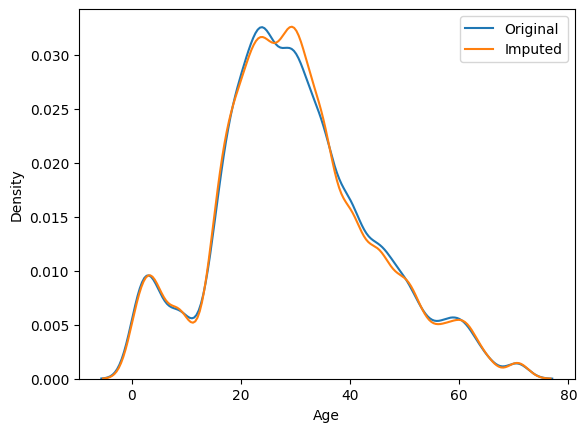

In [62]:
# Using sns.kdeplot for overlaying KDE plots
sns.kdeplot(X_train['Age'], label='Original', bw_adjust=0.5)
sns.kdeplot(X_train['Age_imputed'], label='Imputed', bw_adjust=0.5)

# Add legend and display the plot
plt.legend()
plt.show()

In [64]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  201.4169876167448


In [66]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,67.378626
Age,71.512440,204.349513,204.349513
Age_imputed,67.378626,204.349513,201.416988


<Axes: >

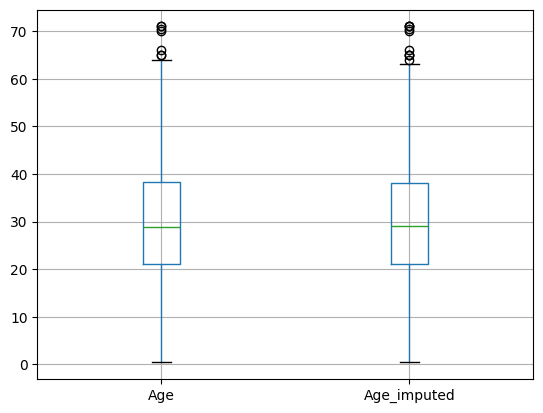

In [68]:
X_train[['Age', 'Age_imputed']].boxplot()

In [80]:
#handling categorical dataset

data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [82]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [84]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [86]:
X = data
y = data['SalePrice']

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [92]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
277,NaN,TA,141000,TA,NaN
1434,Gd,TA,160000,TA,Gd
455,TA,TA,175500,TA,TA
328,NaN,TA,214500,TA,NaN
500,NaN,TA,113000,TA,NaN


In [94]:
# Impute missing values in GarageQual_imputed
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(
    n=X_train['GarageQual_imputed'].isnull().sum(), random_state=42
).values

X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(
    n=X_test['GarageQual_imputed'].isnull().sum(), random_state=42
).values

# Impute missing values in FireplaceQu_imputed
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(
    n=X_train['FireplaceQu_imputed'].isnull().sum(), random_state=42
).values

X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(
    n=X_test['FireplaceQu_imputed'].isnull().sum(), random_state=42
).values

In [98]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [100]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.655443
TA,0.412439,0.533109
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.032548


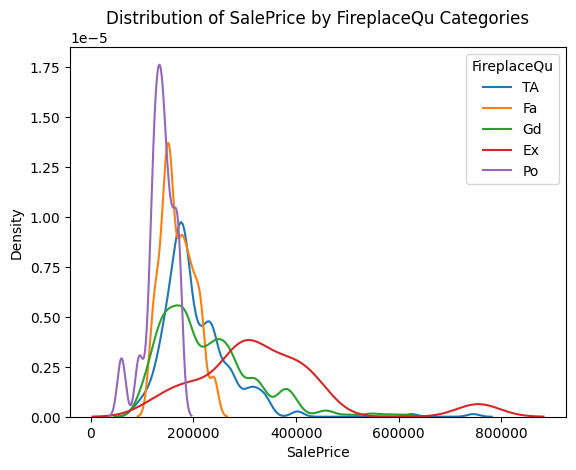

In [114]:
# Loop through each unique category in 'FireplaceQu'
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu'] == category]['SalePrice'],
        label=category,
        bw_adjust=0.5  # Adjusts the bandwidth for smoother or sharper curves
    )

# Display the plot
plt.title("Distribution of SalePrice by FireplaceQu Categories")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.legend(title="FireplaceQu")
plt.show()

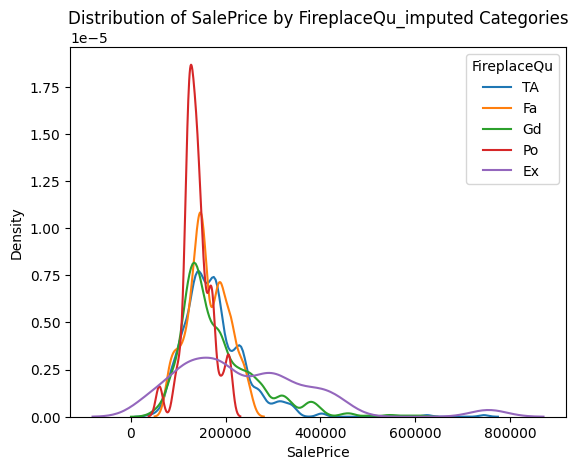

In [126]:
# Loop through each unique category in 'FireplaceQu'
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],
        label=category,
        bw_adjust=0.5  # Adjusts the bandwidth for smoother or sharper curves
    )

# Display the plot
plt.title("Distribution of SalePrice by FireplaceQu_imputed Categories")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.legend(title="FireplaceQu")
plt.show() #not recommmended to use random imputation in this situation not overlapping